# 逻辑回归实验

> 此次练习中，我们使用[Human Activity Recognition Using Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)数据集。它通过对参加测试者的智能手机上安装一个传感器而采集了参加测试者每天的日常活动（ADL）。目标是将日常活动分成六类（walking, walking upstairs, walking downstairs, sitting, standing, and laying）。
>
> 该数据集也可以在Kaggle网站上获得：https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones/downloads/human-activity-recognition-with-smartphones.zip 

把训练文件重新命名为`e2.3_Human_Activity_Recognition_Using_Smartphones_Data.csv`

## 第一步：导入数据

* 查看数据类型---因为有太多的列，所以最好使用value_counts
* 判断其中的小数数值是否需要尺度缩放
* 检查数据中各活动类型的划分
* 把活动类型标签编码成一个整数

In [37]:
import pandas as pd
import numpy as np

filepath = 'e2.3_Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath)

所有列的数据类型都是浮点数，除了活动标签列。

In [38]:
data.dtypes.value_counts()

float64    561
int64        1
object       1
dtype: int64

In [39]:
data.dtypes.tail()

angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
dtype: object

数据都已经全部被缩放到-1到1之间了。

In [40]:
data.iloc[:, :-1].min().value_counts()

-1.000000    466
-0.995377      2
-0.999996      2
-0.999893      2
-1.000000      2
            ... 
-0.999983      1
-0.943439      1
-0.998014      1
-0.999915      1
 1.000000      1
Length: 93, dtype: int64

In [41]:
data.iloc[:, :-1].max().value_counts()

1.000000     452
0.994731       2
0.805064       1
0.908361       1
0.891736       1
            ... 
0.990935       1
0.979031       1
0.928416       1
0.848031       1
30.000000      1
Length: 110, dtype: int64

检查数据中各活动类型的划分---已经比较平衡了。

In [42]:
data.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

Scikit learn的分类器不接受一个稀疏矩阵作为预测列。所以，可以使用`LabelEncoder`将活动标签编码为整数。

In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

5593    3
4163    4
4519    5
640     4
6463    2
Name: Activity, dtype: int64

## 第二步：划分训练数据和测试数据

* 可以考虑使用Scikit-learn中的`StratifiedShuffleSplit`，以保证划分后的数据集中每个类别个案的比例与整个数据集相同。


In [44]:
feature_cols = data.columns[:-1]

from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [45]:
y_train.value_counts(normalize=True)

0    0.191411
2    0.186941
1    0.174893
3    0.166731
5    0.145939
4    0.134085
Name: Activity, dtype: float64

In [46]:
y_test.value_counts(normalize=True)

0    0.191296
2    0.186763
1    0.174977
3    0.166818
5    0.145966
4    0.134180
Name: Activity, dtype: float64

## 第三步：训练模型

* 用所有特征训练一个基本的使用缺省参数的逻辑回归模型。
* 分别用L1和L2正则化来训练一个模型，使用交叉验证确定超参数的值。注意，正则化模型，尤其是L1模型可能需要一定训练时间。

In [47]:
# 请在此处填写你的代码（训练一个基本的使用缺省参数的逻辑回归模型）
from sklearn.linear_model import LogisticRegressionCV
lr=LogisticRegressionCV().fit(X_train, y_train)

/home/ir/dev/justhomework/AIandML/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ir/dev/justhomework/AIandML/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [48]:
# L1 正则化的逻辑回归
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [49]:
# 请在此处填写你的代码（L2 正则化的逻辑回归）
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

## 第四步：

* 输出上面训练出的三个模型中每个特征的系数；
* 并绘制成图来比较它们的差异 （每个类别一张图）

In [50]:
# 请在此处填写你的代码（输出各模型训练到的特征系数值）
print(lr.coef_)
print(lr_l1.coef_)
print(lr_l2.coef_)

[[-0.11183502  0.01204105  0.06963152 ... -0.55016141 -0.20539043
  -0.08843306]
 [-0.08548885 -0.11598664 -0.13913328 ... -1.26772337 -0.25360636
  -0.03148728]
 [ 0.0751782   0.12985791  0.11187319 ...  1.68572526  0.3474987
  -0.08177631]
 [-0.01769051 -0.03426794  0.09696276 ... -0.09957735  0.09537238
   0.05246363]
 [ 0.29121888  0.10542645  0.10344476 ... -0.29944873 -0.12072361
   0.08701147]
 [-0.15138271 -0.09707084 -0.24277896 ...  0.5311856   0.13684932
   0.06222155]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.36405254e+00
   0.00000000e+00 -3.64077773e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  4.37527792e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -5.12308232e-02]
 [-7.97455970e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -7.32824635e-03]
 [ 2.20777060e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.591

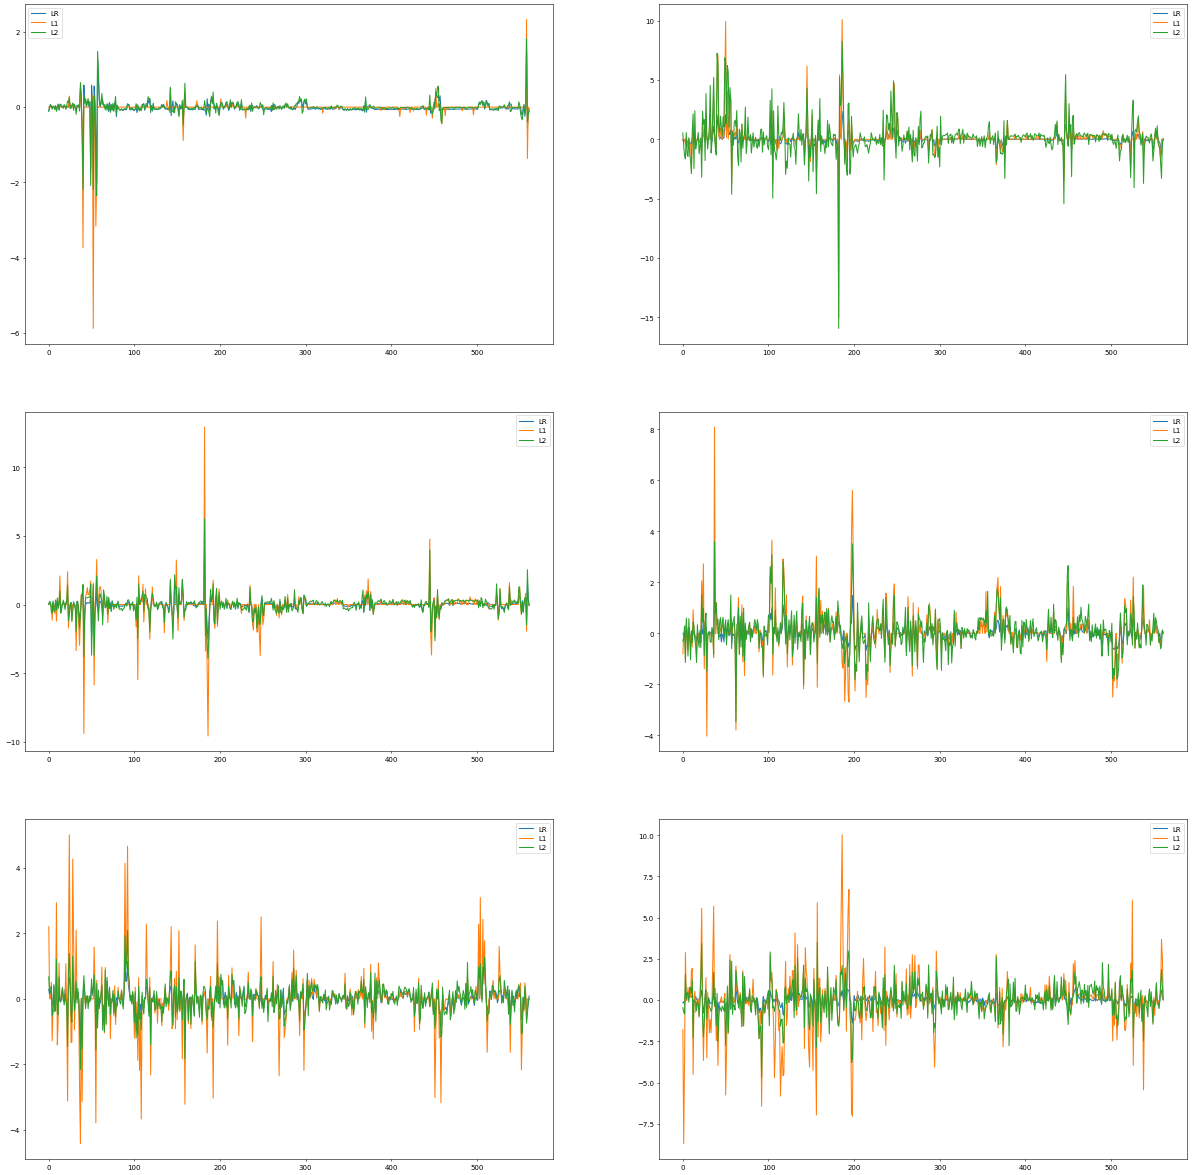

In [51]:
# 请在此处填写你的代码（绘制6张图）
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(30, 30), dpi=50)
for i in range(6):
    plt.subplot(3, 2, i+1)
    data = np.vstack((lr.coef_[i, :], lr_l1.coef_[i, :], lr_l2.coef_[i, :]))
    plt.plot(np.arange(562), data.transpose(), '', label=['LR', 'L1', 'L2'])
    plt.legend()


## 第五步：预测数据

* 将每个模型预测的类别和概率值都保存下来。

In [52]:
# 将每个模型预测的类别和概率值都保存下来。
y_pred = lr.predict(X_test)
y_pred_l1 = lr_l1.predict(X_test)
y_pred_l2 = lr_l2.predict(X_test)

y_pred_proba = lr.predict_proba(X_test)
y_pred_proba_l1 = lr_l1.predict_proba(X_test)
y_pred_proba_l2 = lr_l2.predict_proba(X_test)

## 第六步：评价模型

对每个模型，分别计算下面的各评测指标值： 

* accuracy
* precision
* recall
* fscore
* confusion matrix

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('LR accuracy: ', accuracy_score(y_test, y_pred))
print('LR precision: ', precision_score(y_test, y_pred, average='macro'))
print('LR recall: ', recall_score(y_test, y_pred, average='macro'))
print('LR fscore: ', f1_score(y_test, y_pred, average='macro'))
print('LR confusion matrix: ', confusion_matrix(y_test, y_pred))

print('L1 accuracy: ', accuracy_score(y_test, y_pred_l1))
print('L1 precision: ', precision_score(y_test, y_pred_l1, average='macro'))
print('L1 recall: ', recall_score(y_test, y_pred_l1, average='macro'))
print('L1 fscore: ', f1_score(y_test, y_pred_l1, average='macro'))
print('L1 confusion matrix: ', confusion_matrix(y_test, y_pred_l1))

print('L2 accuracy: ', accuracy_score(y_test, y_pred_l2))
print('L2 precision: ', precision_score(y_test, y_pred_l2, average='macro'))
print('L2 recall: ', recall_score(y_test, y_pred_l2, average='macro'))
print('L2 fscore: ', f1_score(y_test, y_pred_l2, average='macro'))
print('L2 confusion matrix: ', confusion_matrix(y_test, y_pred_l2))

LR accuracy:  0.9873073436083409
LR precision:  0.9883023003161968
LR recall:  0.9881513487864519
LR fscore:  0.9882215465046406
LR confusion matrix:  [[422   0   0   0   0   0]
 [  0 371  15   0   0   0]
 [  0  12 400   0   0   0]
 [  0   0   0 368   0   0]
 [  0   0   0   0 296   0]
 [  0   0   0   1   0 321]]
L1 accuracy:  0.9877606527651859
L1 precision:  0.9887539714995753
L1 recall:  0.9886689471301372
L1 fscore:  0.9887068901807181
L1 confusion matrix:  [[422   0   0   0   0   0]
 [  0 371  15   0   0   0]
 [  0  12 400   0   0   0]
 [  0   0   0 368   0   0]
 [  0   0   0   0 296   0]
 [  0   0   0   0   0 322]]
L2 accuracy:  0.9868540344514959
L2 precision:  0.9878399933872739
L2 recall:  0.9877740662269671
L2 fscore:  0.987806320894575
L2 confusion matrix:  [[422   0   0   0   0   0]
 [  0 372  14   0   0   0]
 [  0  14 398   0   0   0]
 [  0   0   0 368   0   0]
 [  0   0   0   0 296   0]
 [  0   0   0   1   0 321]]
